In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import torch
import torch.nn as nn
import sys
import pathlib
import pickle
from pathlib import Path
sys.path.append(f"{Path.home()}/morpho_repo")
sys.path.append(f"{Path.home()}/morpho_repo/pytorch")
from pinns import *
from local_utils import *

from pinns import *
from intro import *

In [2]:
#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")
dev_str = f"{device.type}:{device.index}"

In [3]:
import pickle
with open(f"./inputs/solution_65.pkl", "rb") as f:
    (run_params, params, solution) = pickle.load(f)
    
    
run_params = Struct(**run_params)
params = Struct(**params)

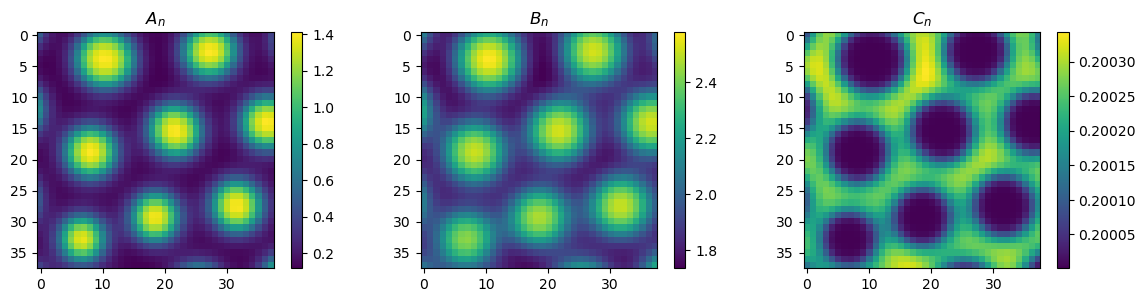

In [4]:
A_n = solution[-1, 0, :, :]
B_n = solution[-1, 1, :, :]
C_n = solution[-1, 2, :, :]

#############################################################
#    Inner boundaries
# By using these slices, we can remove the boundary effects
# or select a smaller portion of the domain
#
#   Important: slices must not be larger than slices(1,-1,1).
#              Otherwise, the boundary effects of finit difference
#              Laplacian cannot be removed
#
x_slice = slice(40,-50, 1)
y_slice = slice(40,-50, 1)

to = create_to(A_n[x_slice,y_slice])
########################################
# Take the average of data points
kernel =np.array([[1, 1],
                  [1, 1]])


A_n = ndimage.convolve(A_n, kernel)/4
B_n = ndimage.convolve(B_n, kernel)/4
C_n = ndimage.convolve(C_n, kernel)/4
############################################################
plot_n_im([A_n[x_slice,y_slice], 
           B_n[x_slice,y_slice], 
           C_n[x_slice,y_slice]], 
          [r"$A_{n}$", r"$B_{n}$", r"$C_{n}$"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()

In [5]:
A_min, A_max = np.min(A_n), np.max(A_n)
B_min, B_max = np.min(B_n), np.max(B_n)
C_min, C_max = np.min(C_n), np.max(C_n)
n = params["n"]
tol = .005

def define_bound(tol, n, x_min, x_max):
    upper = ((1-tol)/tol)**(1/n)
    lower = (tol/(1-tol))**(1/n)
    # return (lower, upper) bounds and the initial guess
    return (max(0,x_min*lower), x_max*upper), max(0, (x_max*upper-max(0,x_min*lower))/2)
    
K_AA_bound, K_AA_init =  define_bound(tol, n, A_min, A_max)
K_AB_bound, K_AB_init =  define_bound(tol, n, A_min, A_max)
K_AC_bound, K_AC_init =  define_bound(tol, n, A_min, A_max)
K_BA_bound, K_BA_init =  define_bound(tol, n, B_min, B_max)
K_BC_bound, K_BC_init =  define_bound(tol, n, B_min, B_max)
K_CB_bound, K_CB_init =  define_bound(tol, n, C_min, C_max)
K_CC_bound, K_CC_init =  define_bound(tol, n, C_min, C_max)

Ks_bounds = {"K_AA":K_AA_bound, 
             "K_AB":K_AB_bound, 
             "K_AC":K_AC_bound,
             "K_BA":K_BA_bound, 
             "K_BC":K_BC_bound,
             "K_CB":K_CB_bound, 
             "K_CC": K_CC_bound}
def closest_bound(name, v):
    if not name.startswith("K"):
        return np.nan
    lower, upper = Ks_bounds[name]
    if np.abs(v-lower) < np.abs(v-upper):
        return lower
    else:
        return upper 
def get_bound(name):
    if not name.startswith("K"):
        return (0, None)
    return Ks_bounds[name]


Epoch: 1 
 data loss:2.926858, 
data A loss:0.717395, data B loss:1.960149, data C loss:0.249315, 
Laplacian A loss:15.697948, Laplacian B loss:8.188840
Physics loss:1.887337
Negative loss:0.134002

 b_A=0.9000, b_B=0.9000, b_C=0.9000, V_A=0.9895, V_B=0.9915, V_C=0.9056, mu_A=0.9000, mu_B=1.0999, K_AA=2.6601, K_AB=2.6573, K_AC=2.6450, K_BA=4.6210, K_BC=4.6210, K_CB=0.3497, K_CC=0.4492


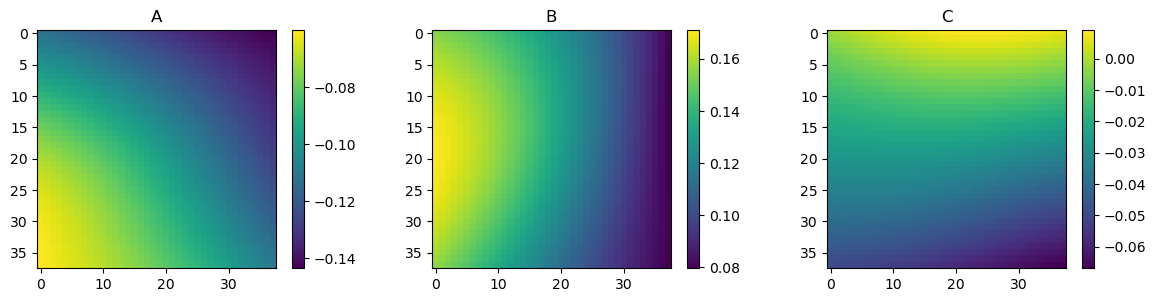

Epoch: 1000 
 data loss:0.380080, 
data A loss:0.170116, data B loss:0.209038, data C loss:0.000926, 
Laplacian A loss:5.062747, Laplacian B loss:8.179824
Physics loss:0.146261
Negative loss:0.077461

 b_A=-0.0481, b_B=0.1824, b_C=0.7160, V_A=0.7958, V_B=0.2370, V_C=0.8431, mu_A=0.2782, mu_B=-0.0200, K_AA=0.8628, K_AB=1.4715, K_AC=4.2681, K_BA=5.7151, K_BC=7.5263, K_CB=0.7248, K_CC=0.2363


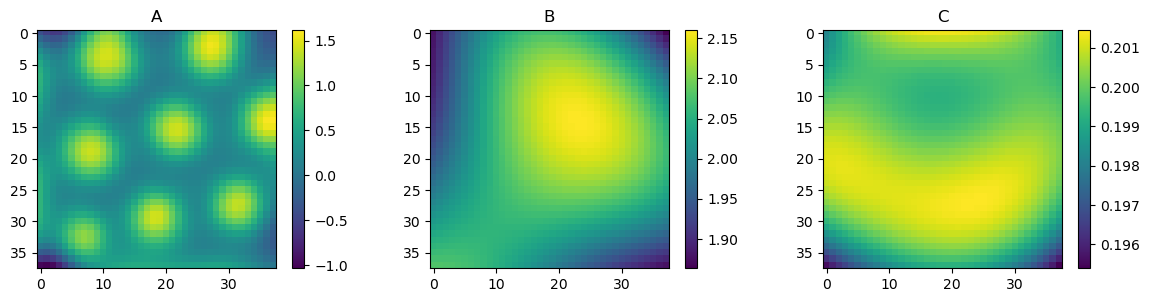

Epoch: 2000 
 data loss:0.230587, 
data A loss:0.080997, data B loss:0.149003, data C loss:0.000587, 
Laplacian A loss:2.388171, Laplacian B loss:4.340137
Physics loss:3.569689
Negative loss:0.016027

 b_A=-0.0215, b_B=-0.0971, b_C=0.7148, V_A=1.0714, V_B=15.7802, V_C=0.8508, mu_A=0.4095, mu_B=2.3145, K_AA=0.8398, K_AB=0.5937, K_AC=4.9096, K_BA=4.6724, K_BC=7.8032, K_CB=0.8035, K_CC=0.2368


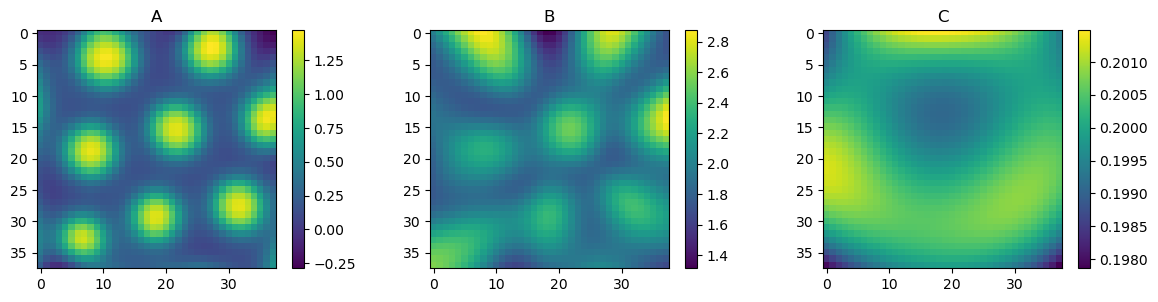

Epoch: 3000 
 data loss:0.110901, 
data A loss:0.045333, data B loss:0.065186, data C loss:0.000381, 
Laplacian A loss:1.374257, Laplacian B loss:1.538878
Physics loss:1.807159
Negative loss:0.000000

 b_A=-0.0149, b_B=-0.0122, b_C=0.7369, V_A=1.2983, V_B=23.2155, V_C=0.8542, mu_A=0.4271, mu_B=4.1015, K_AA=0.8495, K_AB=0.5183, K_AC=5.3030, K_BA=3.4777, K_BC=8.2965, K_CB=0.7587, K_CC=0.2420


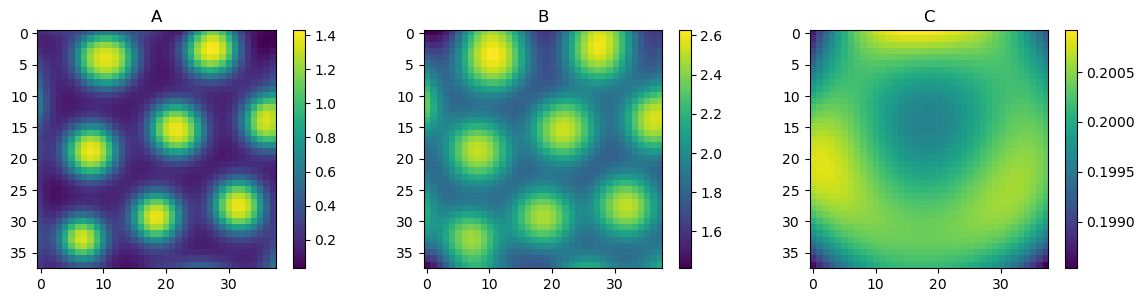

Epoch: 4000 
 data loss:0.093923, 
data A loss:0.041809, data B loss:0.051863, data C loss:0.000251, 
Laplacian A loss:1.028059, Laplacian B loss:1.072260
Physics loss:1.438604
Negative loss:0.000000

 b_A=-0.0175, b_B=-0.0103, b_C=0.8109, V_A=1.3233, V_B=23.7313, V_C=0.8465, mu_A=0.4373, mu_B=4.2088, K_AA=0.8392, K_AB=0.5168, K_AC=5.3144, K_BA=3.4386, K_BC=8.5168, K_CB=0.7456, K_CC=0.2718


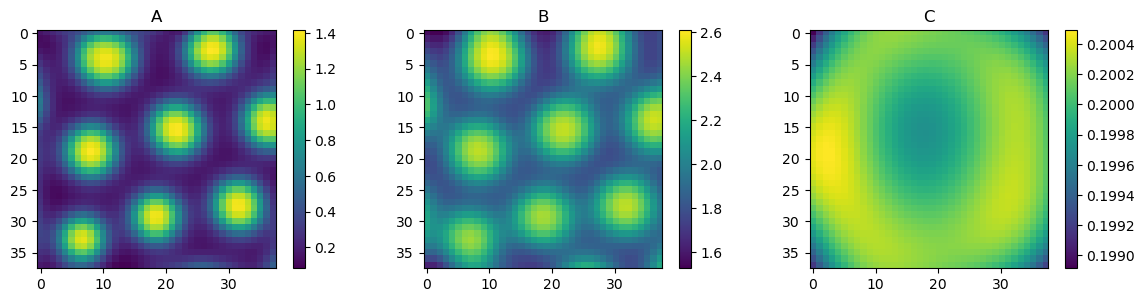

Epoch: 5000 
 data loss:0.083922, 
data A loss:0.037985, data B loss:0.045749, data C loss:0.000187, 
Laplacian A loss:0.807350, Laplacian B loss:0.751700
Physics loss:1.117965
Negative loss:0.000000

 b_A=-0.0205, b_B=-0.0074, b_C=0.8800, V_A=1.3475, V_B=24.0602, V_C=0.8393, mu_A=0.4437, mu_B=4.2731, K_AA=0.8424, K_AB=0.5199, K_AC=5.3143, K_BA=3.3813, K_BC=8.6157, K_CB=0.7524, K_CC=0.3123


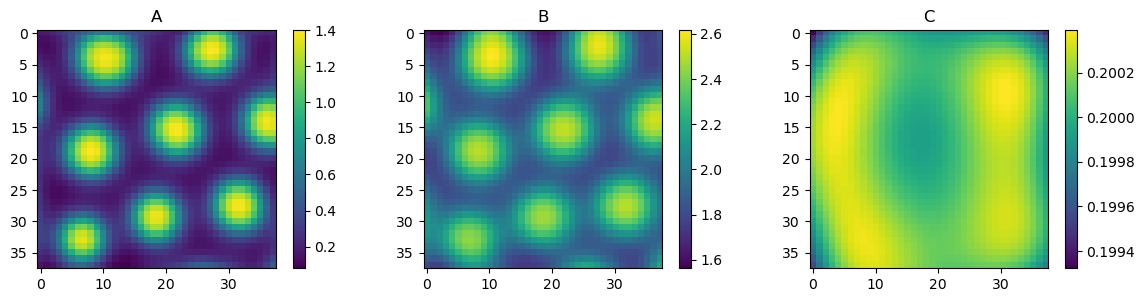

Epoch: 6000 
 data loss:0.065912, 
data A loss:0.034045, data B loss:0.031680, data C loss:0.000187, 
Laplacian A loss:0.652252, Laplacian B loss:0.567223
Physics loss:0.946724
Negative loss:0.000000

 b_A=-0.0296, b_B=-0.0057, b_C=0.9436, V_A=1.4943, V_B=24.1124, V_C=0.8276, mu_A=0.4442, mu_B=4.2870, K_AA=0.8545, K_AB=0.5175, K_AC=5.3143, K_BA=3.0786, K_BC=8.6504, K_CB=0.7550, K_CC=0.3836


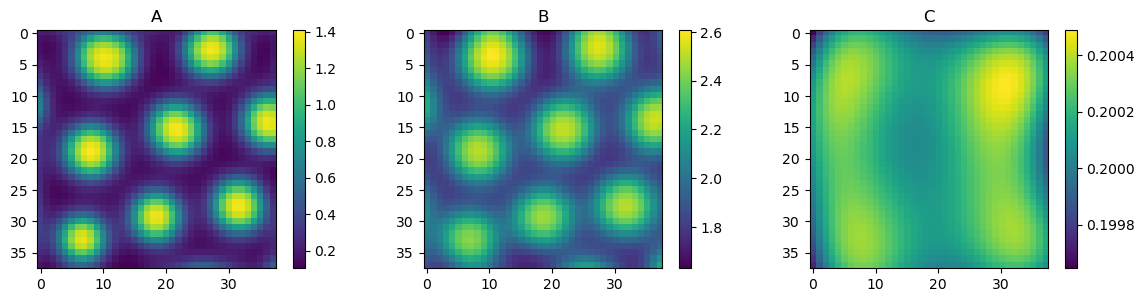

Epoch: 7000 
 data loss:0.049836, 
data A loss:0.029499, data B loss:0.020173, data C loss:0.000164, 
Laplacian A loss:0.550021, Laplacian B loss:0.436712
Physics loss:0.811488
Negative loss:0.000000

 b_A=-0.0324, b_B=-0.0044, b_C=0.9670, V_A=1.6499, V_B=24.1083, V_C=0.8577, mu_A=0.4457, mu_B=4.2915, K_AA=0.8651, K_AB=0.5191, K_AC=5.3138, K_BA=2.8676, K_BC=8.6639, K_CB=0.7514, K_CC=0.4450


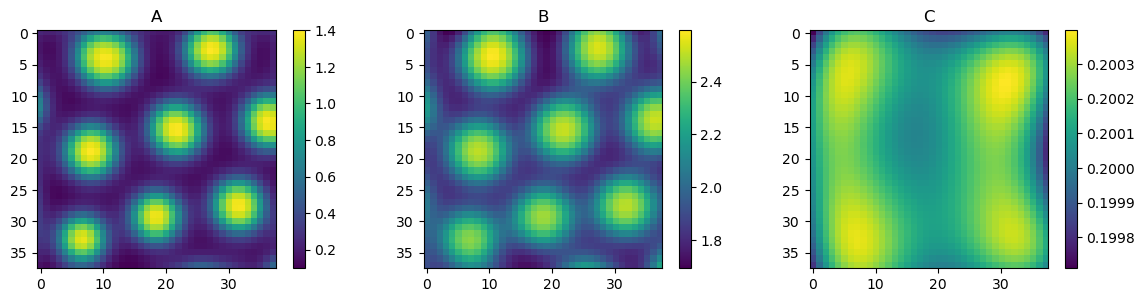

Epoch: 8000 
 data loss:0.040722, 
data A loss:0.027015, data B loss:0.013462, data C loss:0.000245, 
Laplacian A loss:0.480123, Laplacian B loss:0.350623
Physics loss:0.749944
Negative loss:0.000000

 b_A=-0.0349, b_B=-0.0024, b_C=0.9756, V_A=1.8539, V_B=24.1043, V_C=0.9078, mu_A=0.4446, mu_B=4.2884, K_AA=0.8764, K_AB=0.5167, K_AC=5.3140, K_BA=2.6752, K_BC=8.6725, K_CB=0.7545, K_CC=0.4806


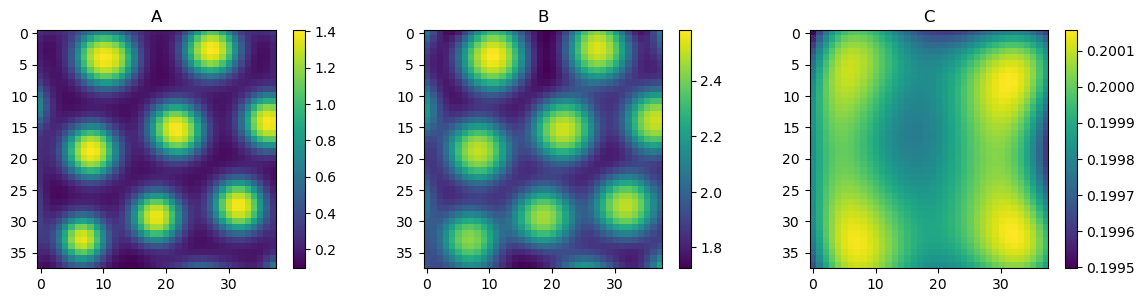

Epoch: 9000 
 data loss:0.035486, 
data A loss:0.024736, data B loss:0.010593, data C loss:0.000158, 
Laplacian A loss:0.426807, Laplacian B loss:0.290706
Physics loss:0.687146
Negative loss:0.000000

 b_A=-0.0373, b_B=-0.0032, b_C=0.9809, V_A=1.9635, V_B=24.0488, V_C=0.9649, mu_A=0.4442, mu_B=4.2921, K_AA=0.8822, K_AB=0.5160, K_AC=5.3137, K_BA=2.5897, K_BC=8.6788, K_CB=0.7583, K_CC=0.5214


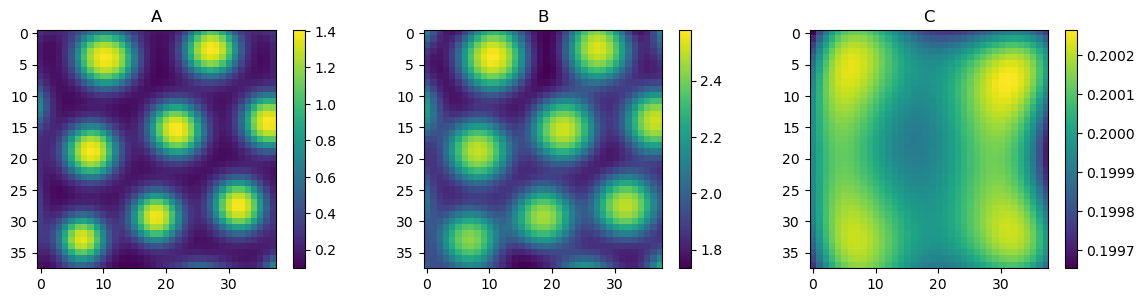

Epoch: 10000 
 data loss:0.036700, 
data A loss:0.026300, data B loss:0.009844, data C loss:0.000556, 
Laplacian A loss:0.387447, Laplacian B loss:0.255780
Physics loss:0.743719
Negative loss:0.000000

 b_A=-0.0467, b_B=-0.0149, b_C=0.9820, V_A=2.0714, V_B=24.0166, V_C=1.0181, mu_A=0.4500, mu_B=4.2908, K_AA=0.8915, K_AB=0.5189, K_AC=5.3132, K_BA=2.5230, K_BC=8.6831, K_CB=0.7262, K_CC=0.5652


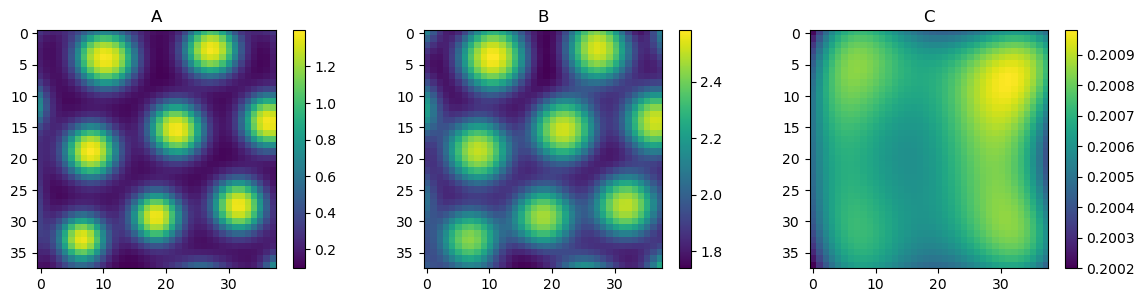

Epoch: 11000 
 data loss:0.033265, 
data A loss:0.023953, data B loss:0.008844, data C loss:0.000468, 
Laplacian A loss:0.356146, Laplacian B loss:0.231298
Physics loss:0.690289
Negative loss:0.000000

 b_A=-0.0510, b_B=-0.0068, b_C=0.9892, V_A=2.1698, V_B=24.0475, V_C=1.0724, mu_A=0.4463, mu_B=4.2499, K_AA=0.8892, K_AB=0.5159, K_AC=5.3127, K_BA=2.4681, K_BC=8.6861, K_CB=0.7502, K_CC=0.6090


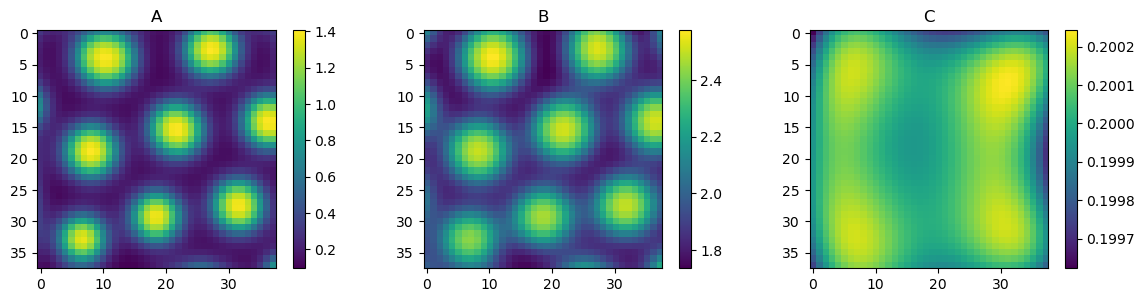

Epoch: 12000 
 data loss:0.045287, 
data A loss:0.034318, data B loss:0.010478, data C loss:0.000491, 
Laplacian A loss:0.337771, Laplacian B loss:0.213475
Physics loss:0.979900
Negative loss:0.000000

 b_A=-0.0352, b_B=0.0051, b_C=0.9936, V_A=2.2595, V_B=24.0955, V_C=1.1231, mu_A=0.4417, mu_B=4.2678, K_AA=0.8950, K_AB=0.5196, K_AC=5.3122, K_BA=2.4252, K_BC=8.6883, K_CB=0.7564, K_CC=0.6516


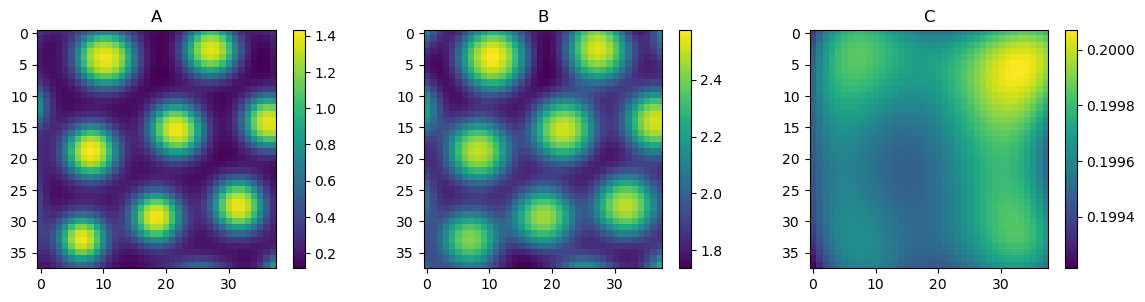

Epoch: 13000 
 data loss:0.030761, 
data A loss:0.022622, data B loss:0.007898, data C loss:0.000241, 
Laplacian A loss:0.311048, Laplacian B loss:0.193187
Physics loss:0.610108
Negative loss:0.000000

 b_A=-0.0385, b_B=-0.0053, b_C=0.9915, V_A=2.3304, V_B=24.0534, V_C=1.1670, mu_A=0.4462, mu_B=4.3006, K_AA=0.9001, K_AB=0.5192, K_AC=5.3118, K_BA=2.3858, K_BC=8.6899, K_CB=0.7557, K_CC=0.6975


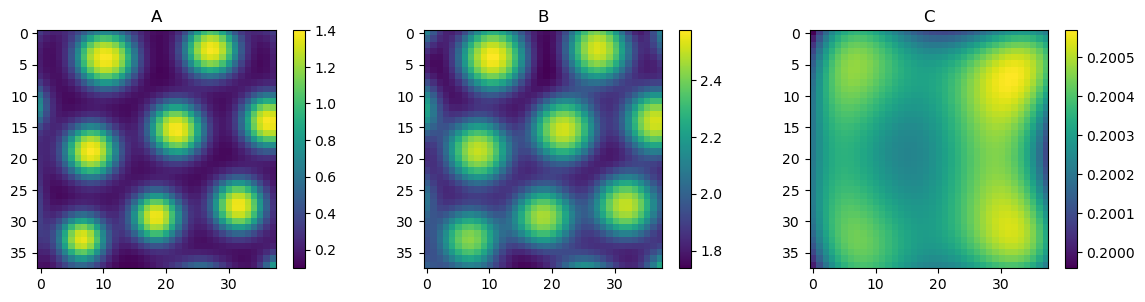

Epoch: 14000 
 data loss:0.029710, 
data A loss:0.021834, data B loss:0.007575, data C loss:0.000300, 
Laplacian A loss:0.293319, Laplacian B loss:0.177361
Physics loss:0.642150
Negative loss:0.000000

 b_A=-0.0323, b_B=0.0011, b_C=0.9959, V_A=2.3933, V_B=24.0728, V_C=1.2096, mu_A=0.4424, mu_B=4.2904, K_AA=0.8998, K_AB=0.5155, K_AC=5.3114, K_BA=2.3624, K_BC=8.6911, K_CB=0.7589, K_CC=0.7381


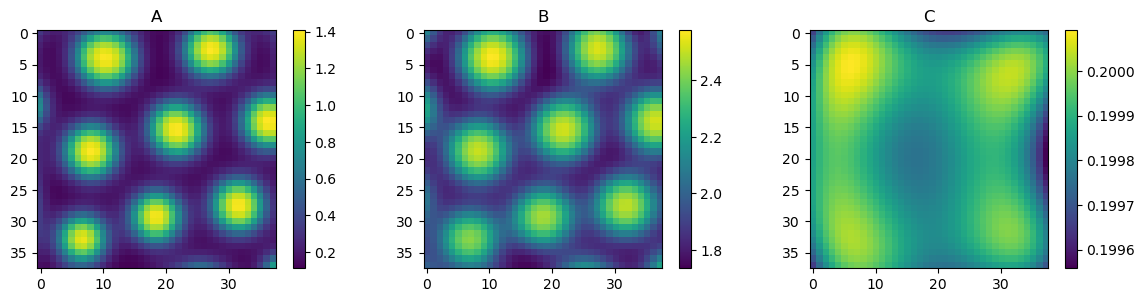

Epoch: 15000 
 data loss:0.045942, 
data A loss:0.034860, data B loss:0.010156, data C loss:0.000926, 
Laplacian A loss:0.286886, Laplacian B loss:0.166732
Physics loss:1.127747
Negative loss:0.000000

 b_A=-0.0328, b_B=0.0115, b_C=1.0001, V_A=2.4622, V_B=24.0919, V_C=1.2393, mu_A=0.4305, mu_B=4.2358, K_AA=0.9042, K_AB=0.5191, K_AC=5.3110, K_BA=2.3350, K_BC=8.6921, K_CB=0.7633, K_CC=0.7463


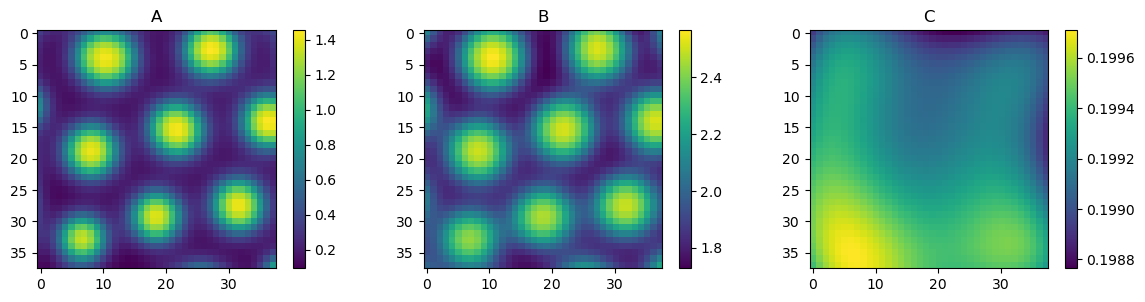

Epoch: 16000 
 data loss:0.027487, 
data A loss:0.019842, data B loss:0.007496, data C loss:0.000149, 
Laplacian A loss:0.265494, Laplacian B loss:0.151647
Physics loss:0.565120
Negative loss:0.000000

 b_A=-0.0354, b_B=-0.0030, b_C=0.9950, V_A=2.5071, V_B=24.0785, V_C=1.2315, mu_A=0.4464, mu_B=4.2910, K_AA=0.9045, K_AB=0.5168, K_AC=5.3106, K_BA=2.3187, K_BC=8.6929, K_CB=0.7541, K_CC=0.7524


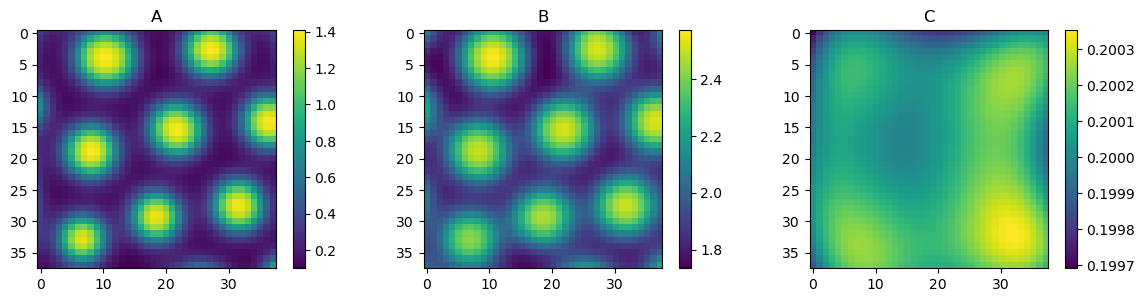

Epoch: 17000 
 data loss:0.042950, 
data A loss:0.033865, data B loss:0.008596, data C loss:0.000489, 
Laplacian A loss:0.266060, Laplacian B loss:0.142268
Physics loss:0.919824
Negative loss:0.000000

 b_A=-0.0447, b_B=-0.0005, b_C=0.9916, V_A=2.5539, V_B=24.0728, V_C=1.2008, mu_A=0.4467, mu_B=4.2826, K_AA=0.9124, K_AB=0.5239, K_AC=5.3102, K_BA=2.2916, K_BC=8.6936, K_CB=0.7487, K_CC=0.7531


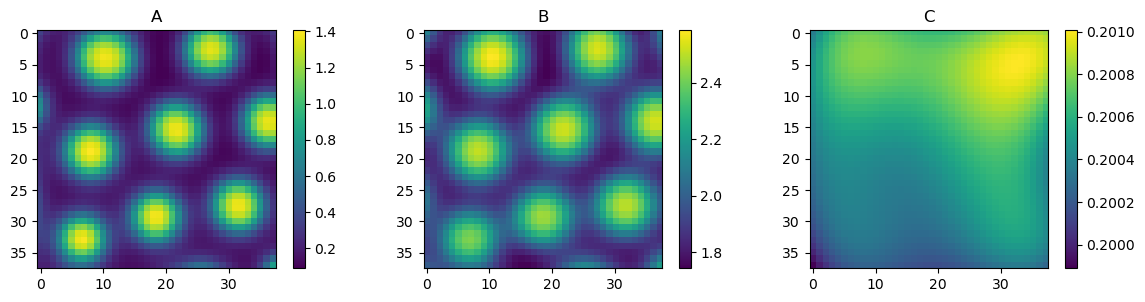

Epoch: 18000 
 data loss:0.024623, 
data A loss:0.018303, data B loss:0.006167, data C loss:0.000152, 
Laplacian A loss:0.242903, Laplacian B loss:0.130806
Physics loss:0.521841
Negative loss:0.000000

 b_A=-0.0362, b_B=-0.0045, b_C=0.9945, V_A=2.5996, V_B=24.0817, V_C=1.1600, mu_A=0.4471, mu_B=4.2915, K_AA=0.9088, K_AB=0.5175, K_AC=5.3097, K_BA=2.2836, K_BC=8.6942, K_CB=0.7518, K_CC=0.7527


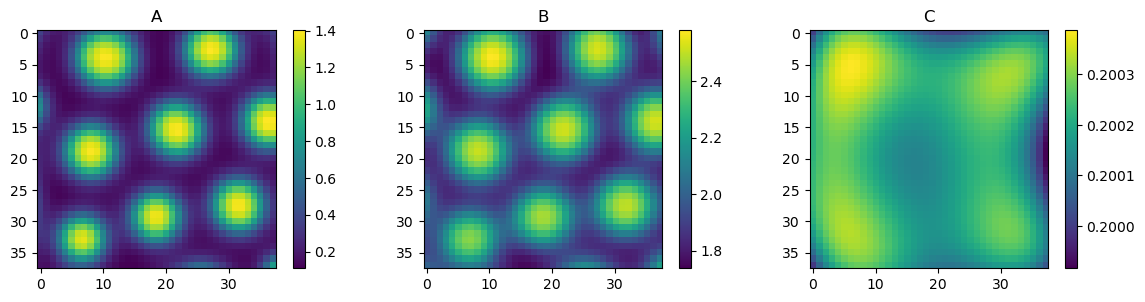

Epoch: 19000 
 data loss:0.029833, 
data A loss:0.022668, data B loss:0.006856, data C loss:0.000309, 
Laplacian A loss:0.235768, Laplacian B loss:0.123979
Physics loss:0.672631
Negative loss:0.000000

 b_A=-0.0324, b_B=0.0022, b_C=0.9974, V_A=2.6454, V_B=24.0841, V_C=1.1146, mu_A=0.4439, mu_B=4.2874, K_AA=0.9079, K_AB=0.5162, K_AC=5.3093, K_BA=2.2700, K_BC=8.6948, K_CB=0.7543, K_CC=0.7499


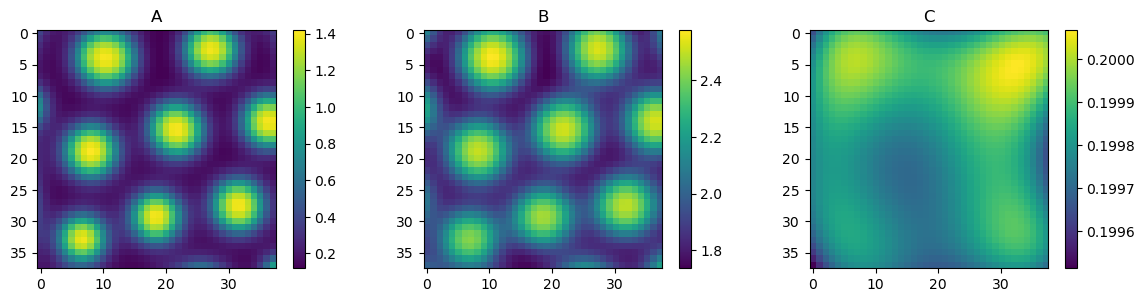

Epoch: 20000 
 data loss:0.023495, 
data A loss:0.017651, data B loss:0.005709, data C loss:0.000135, 
Laplacian A loss:0.223928, Laplacian B loss:0.116008
Physics loss:0.508590
Negative loss:0.000000

 b_A=-0.0352, b_B=-0.0021, b_C=0.9955, V_A=2.6887, V_B=24.0525, V_C=1.0627, mu_A=0.4462, mu_B=4.2971, K_AA=0.9117, K_AB=0.5150, K_AC=5.3089, K_BA=2.2531, K_BC=8.6953, K_CB=0.7531, K_CC=0.7524


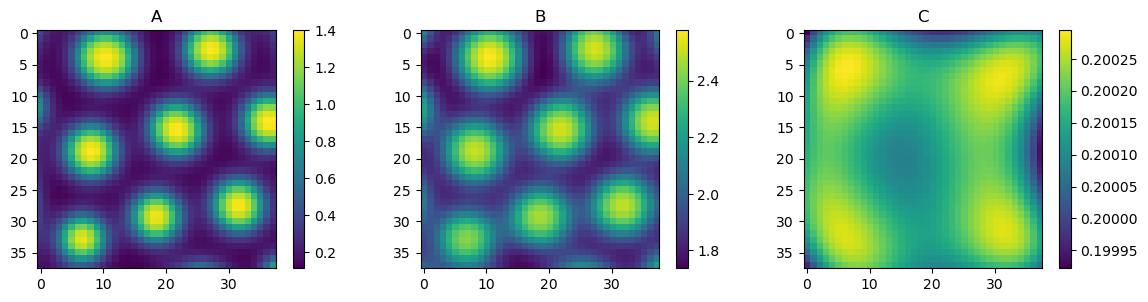

Epoch: 21000 
 data loss:0.024945, 
data A loss:0.018439, data B loss:0.006294, data C loss:0.000212, 
Laplacian A loss:0.215611, Laplacian B loss:0.111293
Physics loss:0.503629
Negative loss:0.000000

 b_A=-0.0406, b_B=-0.0040, b_C=0.9953, V_A=2.7101, V_B=24.0666, V_C=1.0077, mu_A=0.4477, mu_B=4.2879, K_AA=0.9126, K_AB=0.5204, K_AC=5.3085, K_BA=2.2456, K_BC=8.6958, K_CB=0.7570, K_CC=0.7521


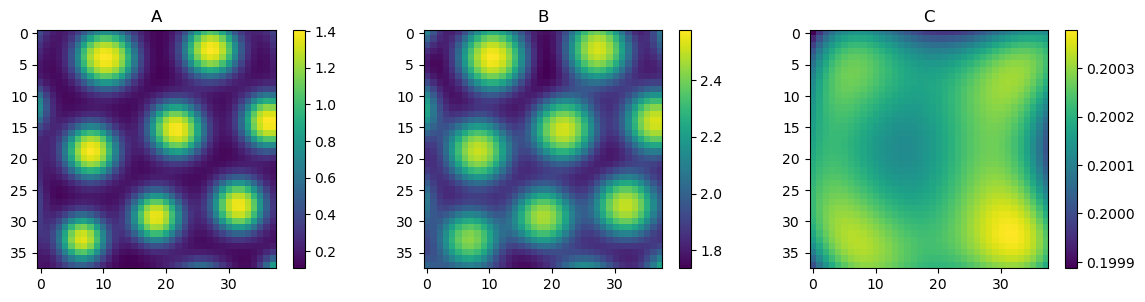

Epoch: 22000 
 data loss:0.026755, 
data A loss:0.019918, data B loss:0.006466, data C loss:0.000371, 
Laplacian A loss:0.207913, Laplacian B loss:0.107043
Physics loss:0.647513
Negative loss:0.000000

 b_A=-0.0302, b_B=0.0006, b_C=0.9986, V_A=2.7699, V_B=24.0181, V_C=0.9572, mu_A=0.4462, mu_B=4.2958, K_AA=0.9116, K_AB=0.5127, K_AC=5.3081, K_BA=2.2353, K_BC=8.6961, K_CB=0.7625, K_CC=0.7493


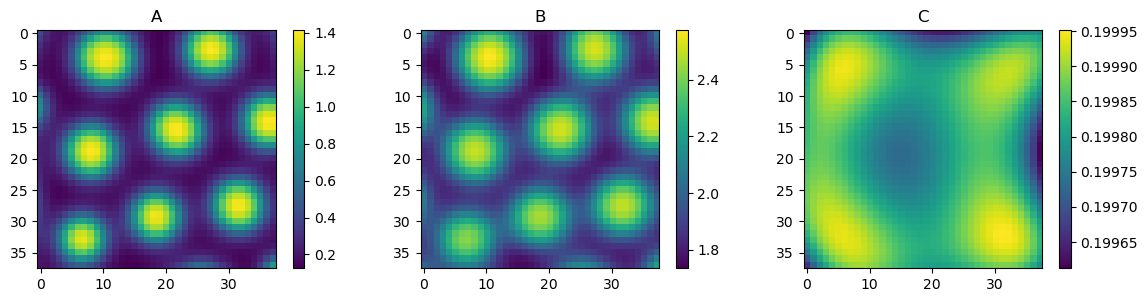

Epoch: 23000 
 data loss:0.022840, 
data A loss:0.017096, data B loss:0.005553, data C loss:0.000191, 
Laplacian A loss:0.198905, Laplacian B loss:0.101398
Physics loss:0.520637
Negative loss:0.000000

 b_A=-0.0345, b_B=-0.0028, b_C=0.9980, V_A=2.8176, V_B=24.0341, V_C=0.9050, mu_A=0.4473, mu_B=4.2956, K_AA=0.9137, K_AB=0.5132, K_AC=5.3077, K_BA=2.2179, K_BC=8.6965, K_CB=0.7360, K_CC=0.7510


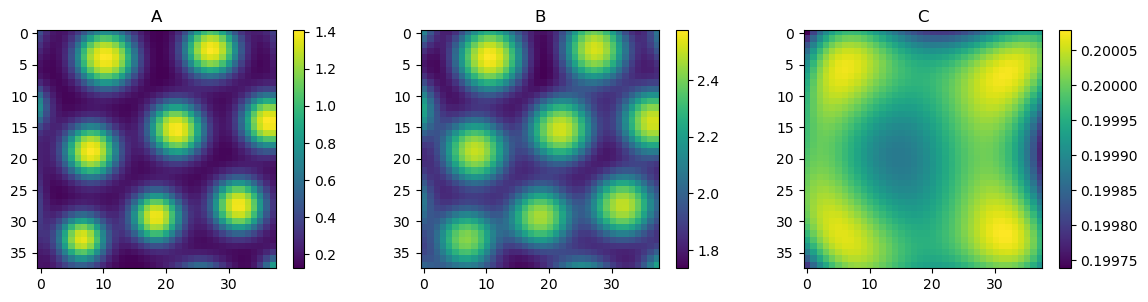

Epoch: 24000 
 data loss:0.031333, 
data A loss:0.021606, data B loss:0.009456, data C loss:0.000272, 
Laplacian A loss:0.194737, Laplacian B loss:0.104688
Physics loss:0.626156
Negative loss:0.000000

 b_A=-0.0378, b_B=-0.0050, b_C=0.9943, V_A=2.8716, V_B=24.0720, V_C=0.8519, mu_A=0.4483, mu_B=4.2983, K_AA=0.9191, K_AB=0.5204, K_AC=5.3074, K_BA=2.1927, K_BC=8.6968, K_CB=0.7483, K_CC=0.7532


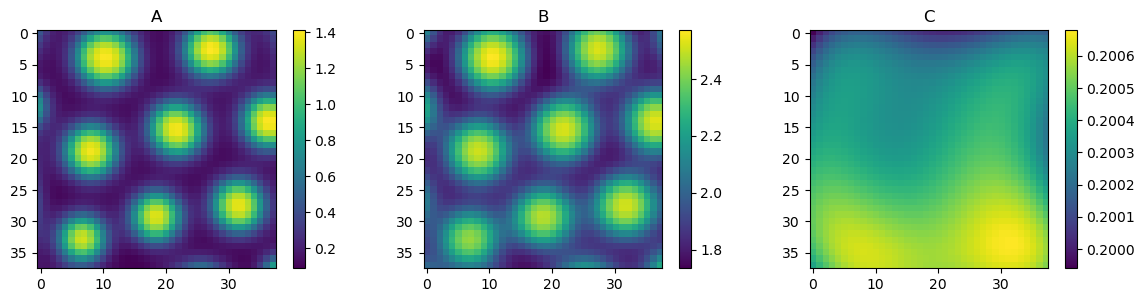

Epoch: 25000 
 data loss:0.022347, 
data A loss:0.016361, data B loss:0.005821, data C loss:0.000165, 
Laplacian A loss:0.183987, Laplacian B loss:0.094485
Physics loss:0.509122
Negative loss:0.000000

 b_A=-0.0341, b_B=-0.0002, b_C=0.9976, V_A=2.9072, V_B=24.0648, V_C=0.8005, mu_A=0.4447, mu_B=4.2929, K_AA=0.9163, K_AB=0.5156, K_AC=5.3070, K_BA=2.1853, K_BC=8.6970, K_CB=0.7579, K_CC=0.7517


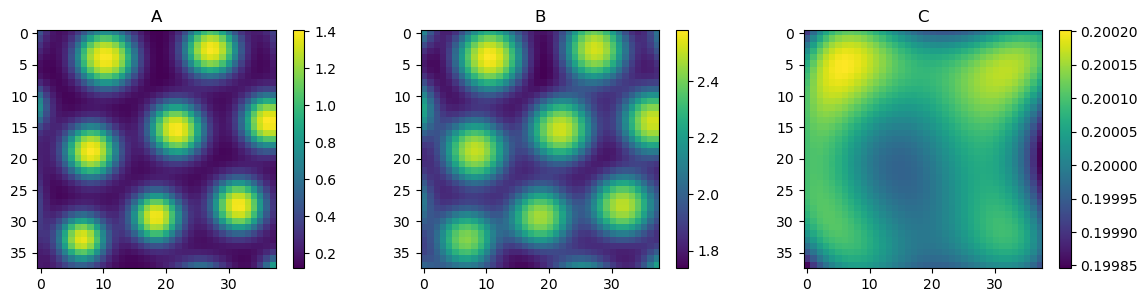

Epoch: 26000 
 data loss:0.020490, 
data A loss:0.015397, data B loss:0.004971, data C loss:0.000123, 
Laplacian A loss:0.176835, Laplacian B loss:0.090167
Physics loss:0.475630
Negative loss:0.000000

 b_A=-0.0356, b_B=-0.0022, b_C=0.9974, V_A=2.9380, V_B=24.0790, V_C=0.7490, mu_A=0.4472, mu_B=4.2918, K_AA=0.9173, K_AB=0.5164, K_AC=5.3067, K_BA=2.1788, K_BC=8.6972, K_CB=0.7545, K_CC=0.7525


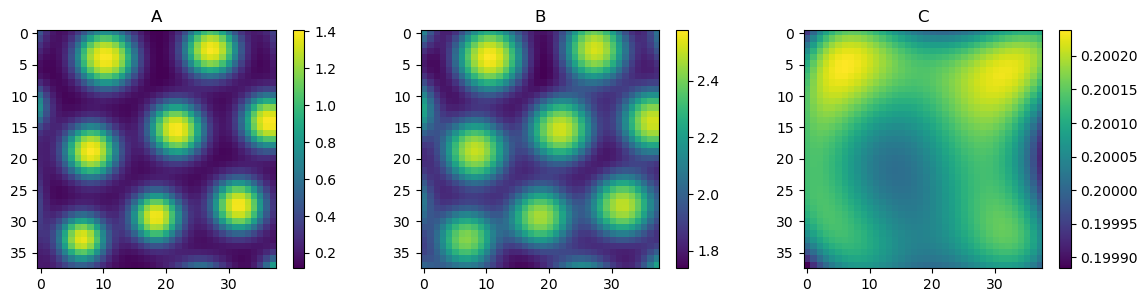

Epoch: 27000 
 data loss:0.019874, 
data A loss:0.014819, data B loss:0.004891, data C loss:0.000164, 
Laplacian A loss:0.170117, Laplacian B loss:0.087260
Physics loss:0.486210
Negative loss:0.000000

 b_A=-0.0334, b_B=-0.0004, b_C=0.9986, V_A=2.9851, V_B=24.0795, V_C=0.7018, mu_A=0.4458, mu_B=4.2935, K_AA=0.9175, K_AB=0.5155, K_AC=5.3064, K_BA=2.1665, K_BC=8.6974, K_CB=0.7551, K_CC=0.7513


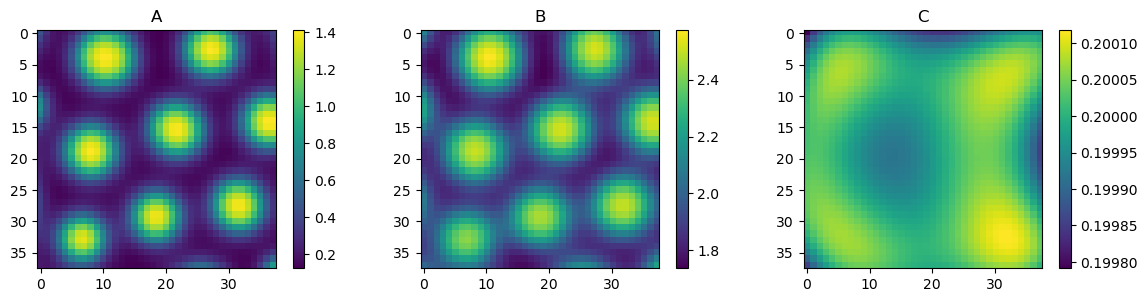

Epoch: 28000 
 data loss:0.029130, 
data A loss:0.021947, data B loss:0.006997, data C loss:0.000186, 
Laplacian A loss:0.171485, Laplacian B loss:0.088186
Physics loss:0.632697
Negative loss:0.000000

 b_A=-0.0434, b_B=-0.0055, b_C=0.9976, V_A=3.0131, V_B=24.0439, V_C=0.6533, mu_A=0.4493, mu_B=4.2828, K_AA=0.9185, K_AB=0.5176, K_AC=5.3061, K_BA=2.1568, K_BC=8.6976, K_CB=0.7422, K_CC=0.7528


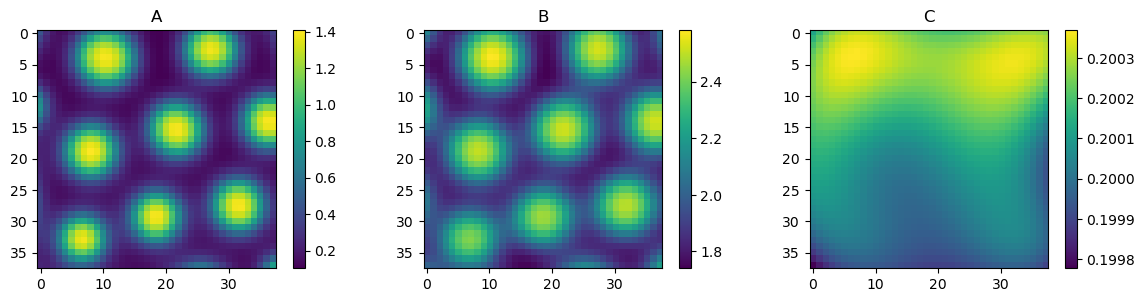

Epoch: 29000 
 data loss:0.022788, 
data A loss:0.017125, data B loss:0.005445, data C loss:0.000218, 
Laplacian A loss:0.161803, Laplacian B loss:0.083015
Physics loss:0.519212
Negative loss:0.000000

 b_A=-0.0446, b_B=-0.0105, b_C=0.9954, V_A=3.0392, V_B=24.0302, V_C=0.6079, mu_A=0.4518, mu_B=4.2889, K_AA=0.9211, K_AB=0.5192, K_AC=5.3058, K_BA=2.1493, K_BC=8.6977, K_CB=0.7351, K_CC=0.7535


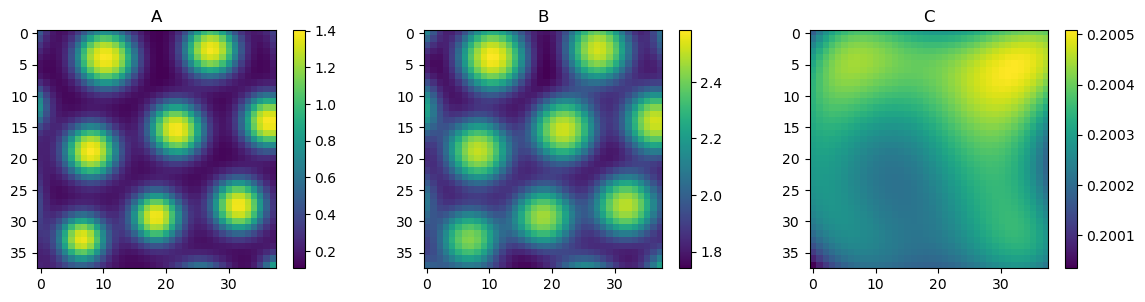

Epoch: 30000 
 data loss:0.032045, 
data A loss:0.023864, data B loss:0.007659, data C loss:0.000522, 
Laplacian A loss:0.160863, Laplacian B loss:0.085983
Physics loss:0.699300
Negative loss:0.000000

 b_A=-0.0705, b_B=-0.0217, b_C=0.9917, V_A=3.0520, V_B=24.0531, V_C=0.5656, mu_A=0.4457, mu_B=4.2521, K_AA=0.9289, K_AB=0.5300, K_AC=5.3055, K_BA=2.1301, K_BC=8.6978, K_CB=0.7320, K_CC=0.7558


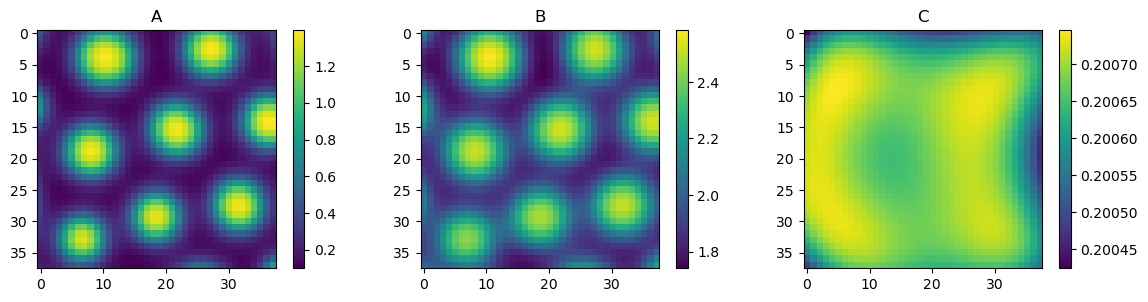

    Early dtoped at 30043
Epoch: 30043 
 data loss:0.017970, 
data A loss:0.013438, data B loss:0.004419, data C loss:0.000113, 
Laplacian A loss:0.154035, Laplacian B loss:0.078879
Physics loss:0.435032
Negative loss:0.000000

 b_A=-0.0325, b_B=-0.0037, b_C=0.9979, V_A=3.0611, V_B=24.0783, V_C=0.5652, mu_A=0.4478, mu_B=4.3002, K_AA=0.9205, K_AB=0.5161, K_AC=5.3055, K_BA=2.1446, K_BC=8.6978, K_CB=0.7503, K_CC=0.7525


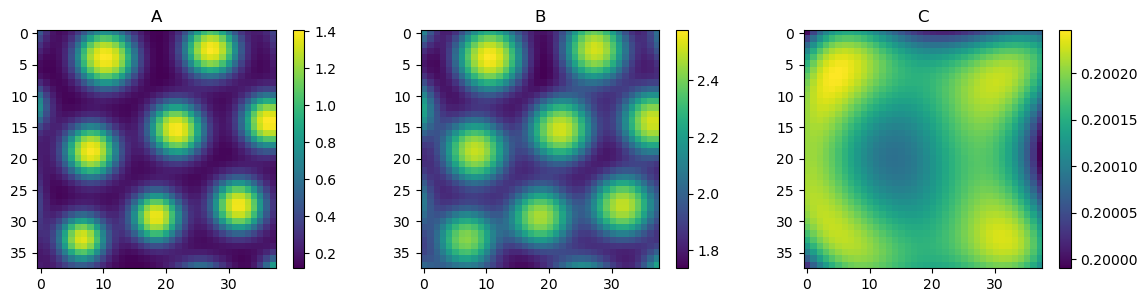

In [6]:
torch.manual_seed(42)
np.random.seed(42)
dtype = torch.float32
torch.set_default_dtype(dtype)

def create_var(init=None):
    if init is None:
        return torch.nn.Parameter(torch.ones(1, requires_grad=True, device=dev_str)), []
    else:
        return torch.nn.Parameter(init*torch.ones(1, requires_grad=True, device=dev_str)), []


D_A=params["D_A"]#, sampled_D_A = create_var()
D_B=params["D_B"]#, sampled_D_B = create_var()
b_A, sampled_b_A = create_var(1)
b_B, sampled_b_B = create_var(1)
b_C, sampled_b_C = create_var(1)
V_A, sampled_V_A = create_var(1)
V_B, sampled_V_B = create_var(1)
V_C, sampled_V_C = create_var(1)
mu_A, sampled_mu_A = create_var(1)
mu_B, sampled_mu_B = create_var(1)
mu_C=params["mu_C"]#, sampled_mu_C = create_var()
K_AA, sampled_K_AA = create_var(K_AA_init)
K_AB, sampled_K_AB = create_var(K_AB_init)
K_AC, sampled_K_AC = create_var(K_AC_init)
K_BA, sampled_K_BA = create_var(K_BA_init)
K_BC, sampled_K_BC = create_var(K_BC_init)
K_CB, sampled_K_CB = create_var(K_CB_init)
K_CC, sampled_K_CC = create_var(K_CC_init)
n = params['n']

params_name_list = [#"D_A", "D_B", 
                    "b_A", "b_B", "b_C", "V_A", "V_B", "V_C", "mu_A", "mu_B", #"mu_C",
                    "K_AA", "K_AB", "K_AC", "K_BA", "K_BC", "K_CB", 
                    "K_CC"
]

params_list = [#D_A, D_B, 
               b_A, b_B, b_C, V_A, V_B, V_C, mu_A, mu_B, #mu_C,
               K_AA, K_AB, K_AC, K_BA, K_BC, K_CB, 
               K_CC
]

params_sampled_list =[#sampled_D_A, sampled_D_B,
                      sampled_b_A, sampled_b_B, sampled_b_C, sampled_V_A, sampled_V_B, sampled_V_C,
                      sampled_mu_A, sampled_mu_B, #sampled_mu_C,
                      sampled_K_AA, sampled_K_AB, sampled_K_AC, sampled_K_BA, sampled_K_BC,
                      sampled_K_CB, sampled_K_CC
                     ]

###########################################################
# Inputs
# restrict to inner boundaries
x = torch.linspace(0, run_params.Lx, run_params.Ix)[x_slice].to(device)
y = torch.linspace(0, run_params.Ly, run_params.Jy)[y_slice].to(device)
X,Y = torch.meshgrid(x, y, indexing='ij')
data_X = torch.vstack([X.flatten(), Y.flatten()]).T.requires_grad_(True).to(device)

def transform(x, l, u):
    return (u-l)*x + l

x2 = transform(torch.rand(run_params.Ix),torch.min(x).item(),torch.max(x).item())
y2 = transform(torch.rand(run_params.Jy),torch.min(y).item(),torch.max(y).item())
X2,Y2 = torch.meshgrid(x2, y2, indexing='ij')
physics_X = torch.vstack([X2.flatten(), Y2.flatten()]).T.requires_grad_(True).to(device)
##########################################################
#   Data
# restrict to inner boundaries
data_A = torch.from_numpy(A_n[x_slice,y_slice].flatten()).to(device)
data_B = torch.from_numpy(B_n[x_slice,y_slice].flatten()).to(device)
data_C = torch.from_numpy(C_n[x_slice,y_slice].flatten()).to(device)
###########################################################
# Laplacians
# First, find the finite-diff Laplacian on the whole domain,
# then, select the inner boundaries. This way, the boundaries 
# effets removed
diffusion_scale_factor = (run_params.Ix-1)*(run_params.Jy-1)/(run_params.Lx*run_params.Ly)
laplacianA = diffusion_scale_factor * grad_diff(A_n)
laplacianB = diffusion_scale_factor * grad_diff(B_n)

laplacianA = torch.tensor(laplacianA[x_slice,y_slice].flatten()).to(device)
laplacianB = torch.tensor(laplacianB[x_slice,y_slice].flatten()).to(device)
###########################################################
zeors_tensor = torch.zeros(data_X.shape[0]).to(device)
###########################################################
# Model
lb = torch.tensor([torch.min(x).item(), torch.min(y).item()]).to(device)
ub = torch.tensor([torch.max(x).item(), torch.max(y).item()]).to(device)
model = Net_sep_dense_normalised(2,3,[128,128,128,128], lb, ub).to(device)
###########################################################
# optimizer
optimizer = torch.optim.Adam([{'params': model.parameters(), 'lr': 1e-4},
                              {'params': params_list, 'lr': .1}]
                              , lr=1e-4)#.LBFGS([*model.parameters(), *params_list], lr=1
                             #,line_search_fn='strong_wolfe')#


epochs = 30000
loss_data = 0.0
lambda_data = 1.0
loss_physics = 0.0
lambda_physics = 1e-4
loss_laplacian_physics = 0.0
lambda_physics_laplacian = 1e-2
loss_negative = 0
lambda_negative = 100

losses = np.zeros((7, epochs+6000))
last_loss = np.inf

def act(x, km, n=2):
    return x**n / (x**n + km**n)

def inh(x, km, n=2):
    return km**n / (x**n + km**n)

for i in range(epochs +6000): 
    # L-BFGS
    def closure():
        
        optimizer.zero_grad()

        #################################
        # data loss
        data_f_hat = model(data_X)
        data_A_hat = data_f_hat[0].squeeze() 
        data_B_hat = data_f_hat[1].squeeze() 
        data_C_hat = data_f_hat[2].squeeze() 
        loss_A_data = torch.mean((data_A - data_A_hat)**2)
        loss_B_data = torch.mean((data_B - data_B_hat)**2)
        loss_C_data = torch.mean((data_C - data_C_hat)**2)
        loss_data = (loss_A_data + loss_B_data + loss_C_data)/3
        #################################
        loss_negative = torch.mean(torch.maximum(-data_A_hat, zeors_tensor)**2
                       )+ torch.mean(torch.maximum(-data_B_hat, zeors_tensor)**2
                       )+ torch.mean(torch.maximum(-data_C_hat, zeors_tensor)**2
                       )
        #################################
        # Laplacians derivatives        
        laplacianA_hat = Laplacian(data_A_hat, data_X)
        laplacianB_hat = Laplacian(data_B_hat, data_X)
        
        A_loss_laplacian = torch.mean((laplacianA_hat-laplacianA)**2)
        B_loss_laplacian = torch.mean((laplacianB_hat-laplacianB)**2)
        loss_laplacian_physics = A_loss_laplacian + B_loss_laplacian
        ###############################
        # physics derivatives  
        physics_f_hat = model(physics_X)
        A = physics_f_hat[0].squeeze() 
        B = physics_f_hat[1].squeeze() 
        C = physics_f_hat[2].squeeze() 
        
        laplacianA_hat = Laplacian(A, physics_X)
        laplacianB_hat = Laplacian(B, physics_X)
        
        F_A =  b_A + V_A*act(A, K_AA, n)*inh(B, K_BA, n) - mu_A * A    
        F_B =  b_B + V_B*act(A, K_AB, n)*inh(C, K_CB, n) - mu_B * B        
        F_C =  b_C + V_C*inh(A, K_AC, n)*inh(B, K_BC, n)*act(C, K_CC, n) - mu_C * C        

        dAdt = D_A * laplacianA_hat + F_A
        dBdt = D_B * laplacianB_hat + F_B
        dCdt = F_C
        ################################
        # physics loss
        # Construct the physics loss here
        A_loss_physics = torch.mean(dAdt**2)
        B_loss_physics = torch.mean(dBdt**2)
        C_loss_physics = torch.mean(dCdt**2)
        loss_physics = (A_loss_physics  
                        + B_loss_physics 
                        + C_loss_physics)
        ###############################
        total_loss = (
            +lambda_data*loss_data            
            +lambda_physics_laplacian*loss_laplacian_physics
            +lambda_physics*loss_physics
            #+lambda_negative*loss_negative
                        )

        total_loss.backward(retain_graph=True)
        
        
        losses[:,i] = (loss_A_data.item(), loss_B_data.item(), loss_C_data.item(), 
                       A_loss_laplacian.item(), B_loss_laplacian.item(),
                       loss_physics.item(), loss_negative.item())                    
            
        return total_loss
    
    
    
    optimizer.step(closure)
    
    def show_outputs(i):
        ls = np.sqrt(losses[:, i])
        print("============================================")
        print(f"Epoch: {i+1} \n data loss:{np.sum(ls[0:3]):.6f}, \n"
              f"data A loss:{ls[0]:.6f}, data B loss:{ls[1]:.6f}, data C loss:{ls[2]:.6f}, \n"
              f"Laplacian A loss:{ls[3]:.6f}, Laplacian B loss:{ls[4]:.6f}\n"
              f"Physics loss:{ls[5]:.6f}\n"
              f"Negative loss:{ls[6]:.6f}\n"
              f"\n"
              ,
              ", ".join([f"{name}={param.item():.4f}" for param, name in zip(params_list, params_name_list)])
             )
        data_f_hat = model(data_X)        
        data_A_hat = data_f_hat[0].squeeze() 
        data_B_hat = data_f_hat[1].squeeze() 
        data_C_hat = data_f_hat[2].squeeze() 
        plot_n_im([to(data_A_hat.cpu().detach().numpy()), 
                   to(data_B_hat.cpu().detach().numpy()), 
                   to(data_C_hat.cpu().detach().numpy())], 
           ["A","B","C"],          
        figsize=(12, 3)); plt.tight_layout();plt.show()
       
    
    if i < epochs and last_loss > np.sum(losses[:,i]):
        last_loss =  np.sum(losses[:,i])
            
    elif np.sum(losses[:,i]) < last_loss:
        print("============================================")
        print(f"    Early dtoped at {i+1}")
        print("============================================")
        show_outputs(i)
        early_stop = True
        with torch.no_grad():
            for i,(param, name) in enumerate(zip(params_list, params_name_list)):
                l,u = get_bound(name)
                param[:] = param.clamp(l,u)
                params_sampled_list[i].append(param.item())
        break        
    
    if (i+1)%1000 == 0 or i==0:        
        show_outputs(i)
        
    with torch.no_grad():
        for i,(param, name) in enumerate(zip(params_list, params_name_list)):
            l,u = get_bound(name)
            param[:] = param.clamp(l,u)
            params_sampled_list[i].append(param.item())
            


# Plot the trained outputs

A RMSE:0.013365037831516494 B RMSE:0.004408070616680665 C RMSE:0.00011192673459781606
F_A actual:0.027873545637639552, F_A:0.02755233831703663, RMSE: 0.005665204725570043
F_B actual:72.2335422444037, F_B:71.88985443115234, RMSE: 0.38260455441391716
F_C actual:6.159175407762405e-10, F_C:3.2246921932710393e-07, RMSE: 0.0005564331621870952

Laplacian A RMSE: 0.15399524428182707
Laplacian B RMSE: 0.07886123492453413

dAdt RMSE: 0.00576062738362028
dBdt RMSE: 0.38641870179114507
dCdt RMSE: 0.0005564331621870952


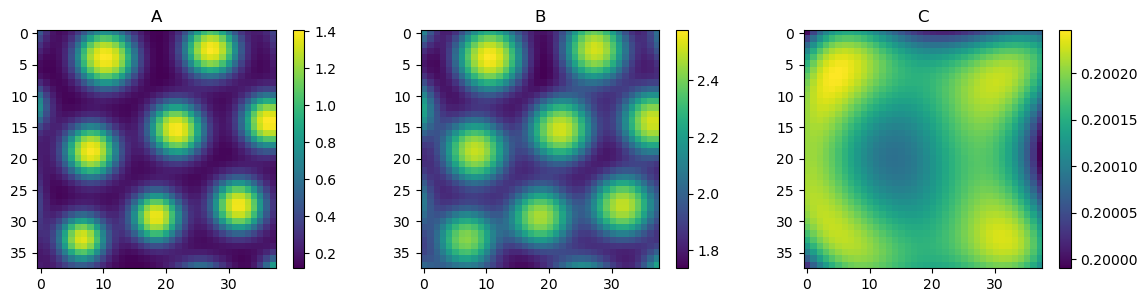

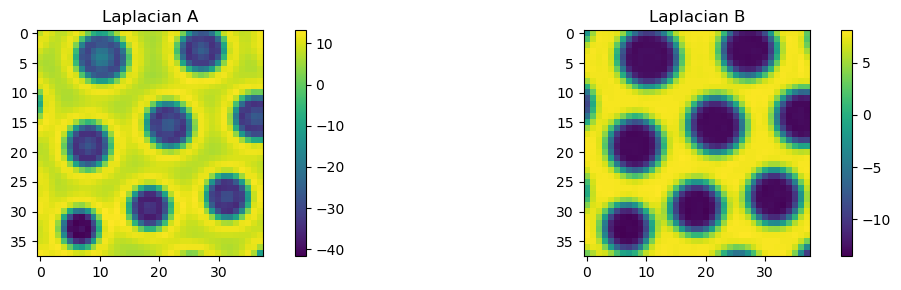

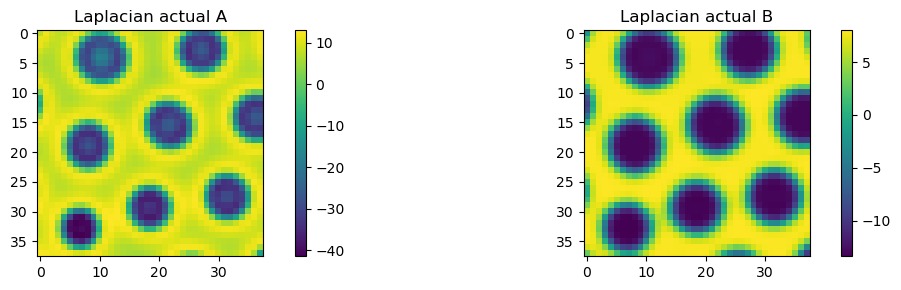

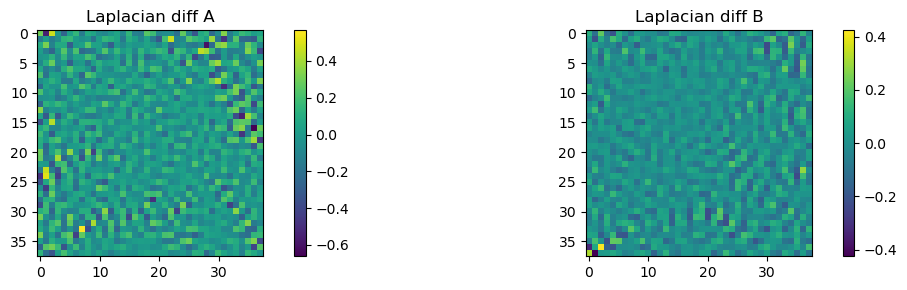

In [7]:
physics_f = model(data_X)
A_hat = physics_f[0].squeeze()
B_hat = physics_f[1].squeeze()
C_hat = physics_f[2].squeeze()

laplacianA_hat = Laplacian(A_hat, data_X)
laplacianB_hat = Laplacian(B_hat, data_X)

A_hat = to(A_hat.cpu().detach().numpy())
B_hat = to(B_hat.cpu().detach().numpy())
C_hat = to(C_hat.cpu().detach().numpy())
laplacianA_hat = to(laplacianA_hat.cpu().detach().numpy())
laplacianB_hat = to(laplacianB_hat.cpu().detach().numpy())


laplacianA = diffusion_scale_factor * grad_diff(A_n)[x_slice,y_slice]
laplacianB = diffusion_scale_factor * grad_diff(B_n)[x_slice,y_slice]

n = params["n"]

A = A_n[x_slice,y_slice]
B = B_n[x_slice,y_slice]
C = C_n[x_slice,y_slice]

F_A =  params["b_A"] + params["V_A"]*act(A, params["K_AA"], n)*inh(B, params["K_BA"], n) - params["mu_A"] * A
F_A_hat =  params["b_A"] + params["V_A"]*act(A_hat, params["K_AA"], n)*inh(B_hat, params["K_BA"], n) - params["mu_A"] * A_hat
F_B =  params["b_B"] + params["V_B"]*act(A, params["K_AB"], n)*inh(C, params["K_CB"], n) - params["mu_B"] * B
F_B_hat =  params["b_B"] + params["V_B"]*act(A_hat, params["K_AB"], n)*inh(C_hat, params["K_CB"], n) - params["mu_B"] * B_hat
F_C =  params["b_C"] + params["V_C"]*inh(A, params["K_AC"], n)*inh(B, params["K_BC"], n)*act(C, params["K_CC"], n) - params["mu_C"] * C
F_C_hat =  params["b_C"] + params["V_C"]*inh(A_hat, params["K_AC"], n)*inh(B_hat, params["K_BC"], n)*act(C_hat, params["K_CC"], n) - params["mu_C"] * C_hat


dAdt = params["D_A"]*laplacianA + F_A
dAdt_hat = params["D_A"]*laplacianA_hat + F_A_hat
dBdt = params["D_B"]*laplacianB + F_B
dBdt_hat = params["D_B"]*laplacianB_hat + F_B_hat

print(f"A RMSE:{np.sqrt(np.mean((A_hat-A)**2))}",
      f"B RMSE:{np.sqrt(np.mean((B_hat-B)**2))}",
      f"C RMSE:{np.sqrt(np.mean((C_hat-C)**2))}")

print(f"F_A actual:{np.mean(F_A**2)}, F_A:{np.mean(F_A_hat**2)}, RMSE: {np.sqrt(np.mean((F_A - F_A_hat)**2))}")
print(f"F_B actual:{np.mean(F_B**2)}, F_B:{np.mean(F_B_hat**2)}, RMSE: {np.sqrt(np.mean((F_B - F_B_hat)**2))}")
print(f"F_C actual:{np.mean(F_C**2)}, F_C:{np.mean(F_C_hat**2)}, RMSE: {np.sqrt(np.mean((F_C - F_C_hat)**2))}")
      

print()
print(f"Laplacian A RMSE: {np.sqrt(np.mean((laplacianA_hat-laplacianA)**2))}")
print(f"Laplacian B RMSE: {np.sqrt(np.mean((laplacianB_hat-laplacianB)**2))}")

print()
print(f"dAdt RMSE: {np.sqrt(np.mean((dAdt-dAdt_hat)**2))}")
print(f"dBdt RMSE: {np.sqrt(np.mean((dBdt-dBdt_hat)**2))}")
print(f"dCdt RMSE: {np.sqrt(np.mean((F_C-F_C_hat)**2))}")

plot_n_im([A_hat, B_hat, C_hat], 
          ["A", "B", "C"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()


plot_n_im([laplacianA_hat, laplacianB_hat], 
          ["Laplacian A", "Laplacian B"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()

plot_n_im([laplacianA, laplacianB], 
          ["Laplacian actual A", "Laplacian actual B"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()

plot_n_im([laplacianA_hat-laplacianA, laplacianB_hat-laplacianB], 
          ["Laplacian diff A", "Laplacian diff B"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()



# Plot losses

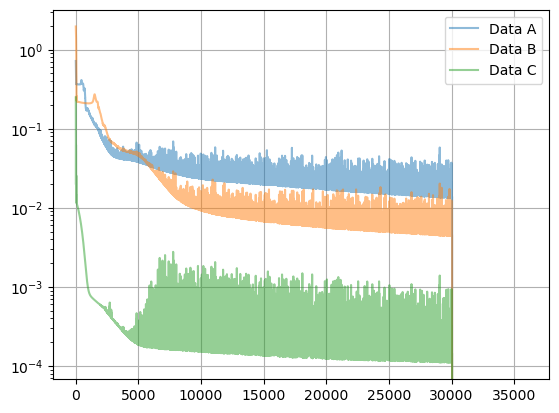

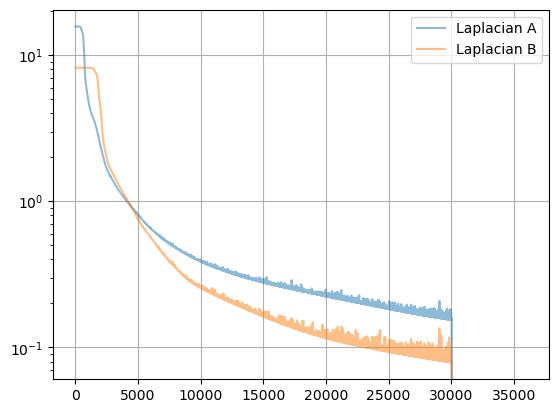

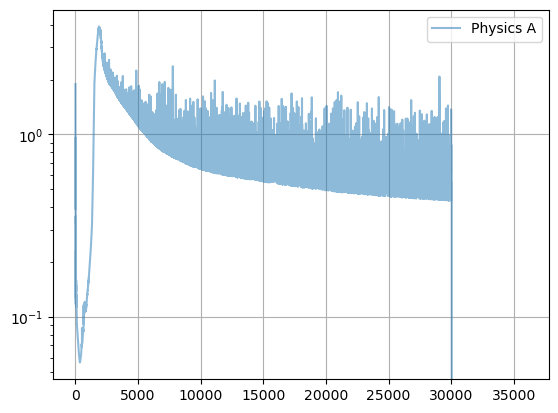

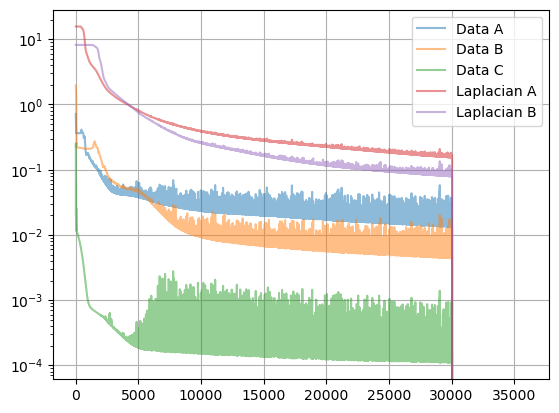

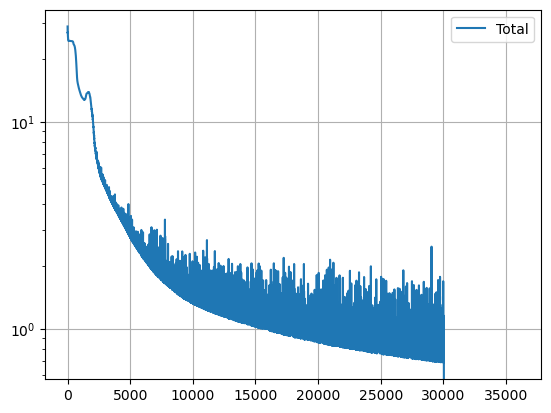

In [8]:
ls= np.sqrt(losses)
plt.plot(ls[0,:], alpha=.5, label="Data A")
plt.plot(ls[1,:], alpha=.5, label="Data B")
plt.plot(ls[2,:], alpha=.5, label="Data C")
plt.yscale('log');plt.grid();plt.legend();plt.show()

plt.plot(ls[3,:], alpha=.5, label="Laplacian A")
plt.plot(ls[4,:], alpha=.5, label="Laplacian B")
plt.yscale('log');plt.grid();plt.legend();plt.show()

plt.plot(ls[5,:], alpha=.5, label="Physics A")
plt.yscale('log');plt.grid();plt.legend();plt.show()


plt.plot(ls[0,:], alpha=.5, label="Data A")
plt.plot(ls[1,:], alpha=.5, label="Data B")
plt.plot(ls[2,:], alpha=.5, label="Data C")
plt.plot(ls[3,:], alpha=.5, label="Laplacian A")
plt.plot(ls[4,:], alpha=.5, label="Laplacian B")
plt.yscale('log'); plt.grid();plt.legend();plt.show()

plt.plot(np.sum(ls, axis=0), label="Total")
plt.yscale('log'); plt.grid();plt.legend();plt.show()


# Plot the trained Field and its difference

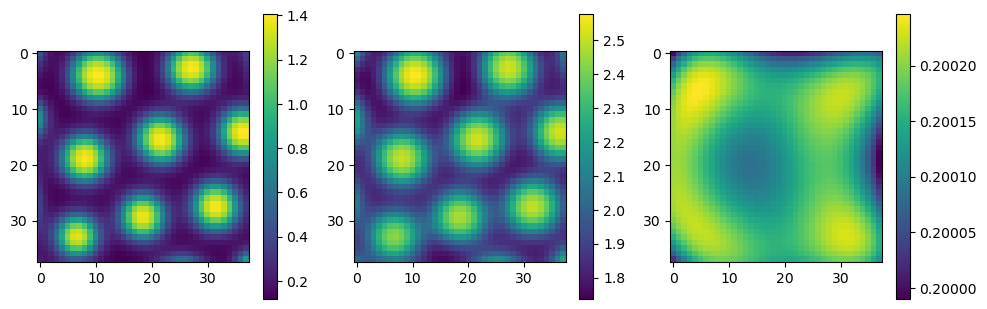

In [9]:
solution_hat = model(data_X)
A_hat = to(solution_hat[0].cpu().detach().numpy())
B_hat = to(solution_hat[1].cpu().detach().numpy())
C_hat = to(solution_hat[2].cpu().detach().numpy())
_ = plt.figure(figsize=(10,6))
plt.subplot(131)
plt.imshow(A_hat)
plt.colorbar(shrink=.5)
plt.subplot(132)
plt.imshow(B_hat)
plt.colorbar(shrink=.5)
plt.subplot(133)
plt.imshow(C_hat)
plt.colorbar(shrink=.5)
plt.tight_layout()
plt.show()

0.013365037831516494
0.004408070616680665
0.00011192673459781606


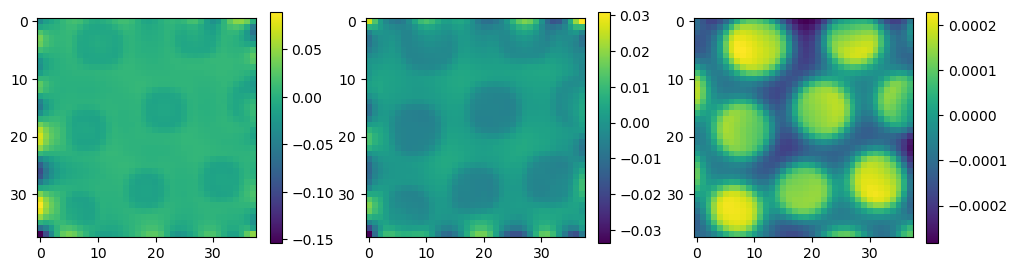

In [10]:
_ = plt.figure(figsize=(12,4))
plt.subplot(131)
plt.imshow(A_hat-A)
print(np.sqrt(np.mean((A_hat-A)**2)))
plt.colorbar(shrink=.75)
plt.subplot(132)
plt.imshow(B_hat-B)
print(np.sqrt(np.mean((B_hat-B)**2)))
plt.colorbar(shrink=.75)
plt.subplot(133)
plt.imshow(C_hat-C)
print(np.sqrt(np.mean((C_hat-C)**2)))
plt.colorbar(shrink=.75)
plt.show()


# Second optimisation
## Find the parameters

In [20]:
estimated_params = dict()
for l, name in zip(params_list, params_name_list):    
    estimated_params[name] = l.item()

In [21]:
Ks_bounds = {"K_AA":K_AA_bound, 
             "K_AB":K_AB_bound, 
             "K_AC":K_AC_bound,
             "K_BA":K_BA_bound, 
             "K_BC":K_BC_bound,
             "K_CB":K_CB_bound, 
             "K_CC": K_CC_bound}
def closest_bound(name, v):
    if not name.startswith("K"):
        return np.nan
    lower, upper = Ks_bounds[name]
    if np.abs(v-lower) < np.abs(v-upper):
        return lower
    else:
        return upper 
def get_bound(name):
    if not name.startswith("K"):
        return (np.nan,np.nan)
    return Ks_bounds[name]
print("name \tOriginl \tEst. \tClosest Bound \tBounds")
print("-------------------------------------------------------------------------------------------------------------")
print("\n".join([ f"{name}:\t{params[name]:.3f}\t\t"                                  
                  f"{estimated_params[name]:.3f}\t\t"
                  f"{closest_bound(name, estimated_params[name]):.3f}\t\t"
                  f"({get_bound(name)[0]:.3f},{get_bound(name)[1]:.3f})"
      for name in params_name_list
]))

name 	Originl 	Est. 	Closest Bound 	Bounds
-------------------------------------------------------------------------------------------------------------
b_A:	0.001		0.000		nan		(nan,nan)
b_B:	1.000		0.000		nan		(nan,nan)
b_C:	1.000		0.998		nan		(nan,nan)
V_A:	50.000		3.061		nan		(nan,nan)
V_B:	25.000		24.078		nan		(nan,nan)
V_C:	10.000		0.565		nan		(nan,nan)
mu_A:	0.500		0.448		nan		(nan,nan)
mu_B:	5.000		4.300		nan		(nan,nan)
K_AA:	1.000		0.920		0.024		(0.024,5.314)
K_AB:	0.500		0.516		0.024		(0.024,5.314)
K_AC:	0.500		5.306		5.314		(0.024,5.314)
K_BA:	1.000		2.145		0.445		(0.445,9.687)
K_BC:	0.500		8.698		9.687		(0.445,9.687)
K_CB:	1.000		0.750		0.753		(0.053,0.753)
K_CC:	0.500		0.752		0.753		(0.053,0.753)


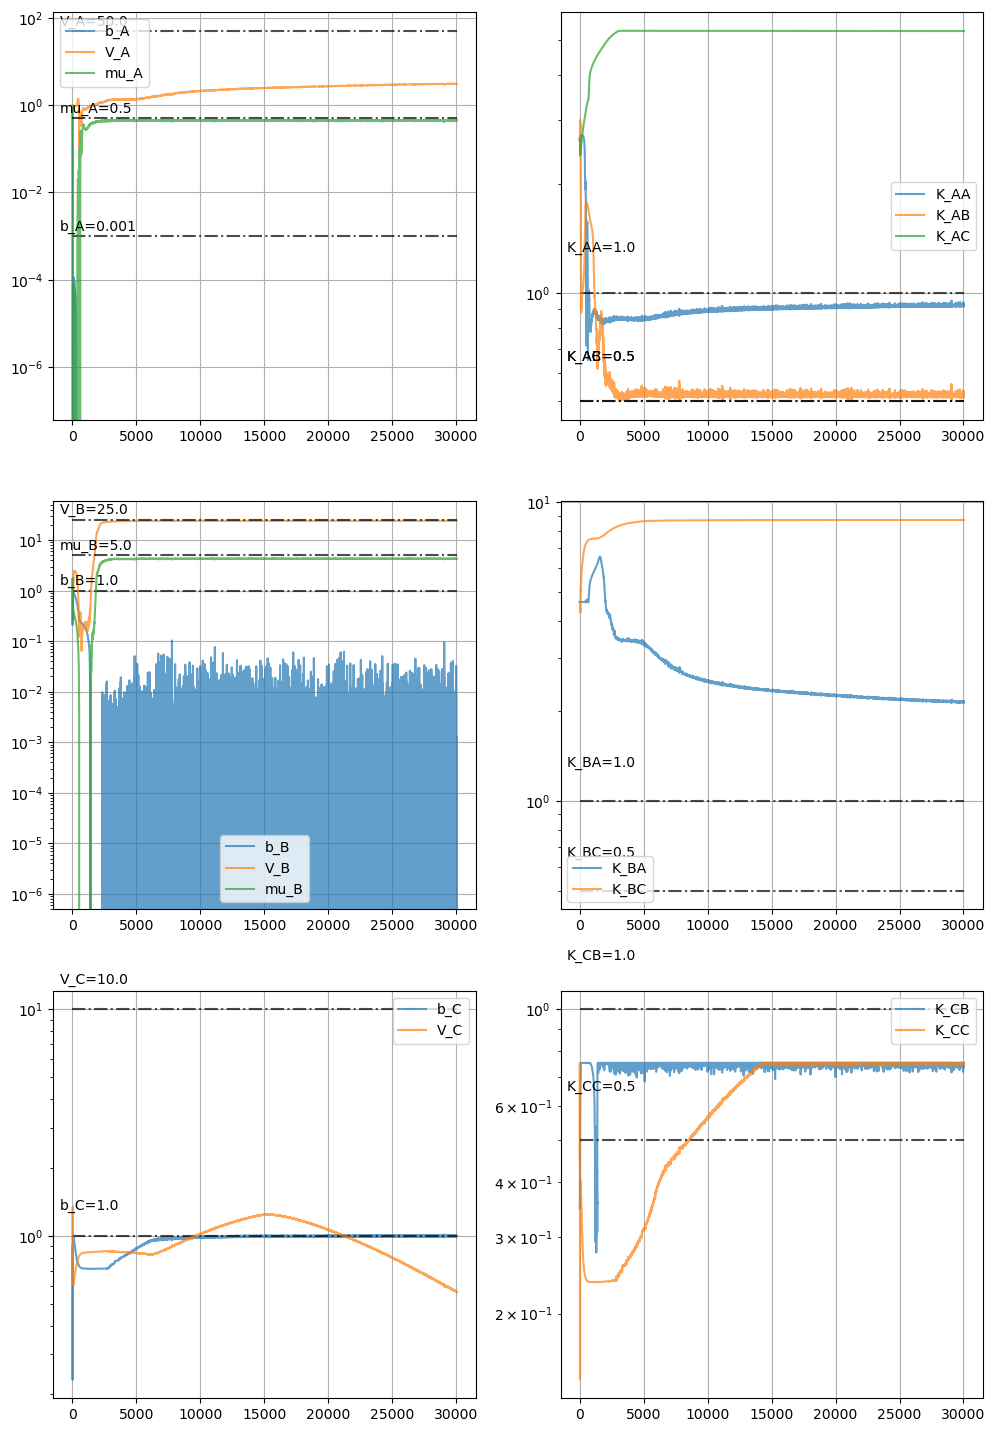

In [19]:
def plot_params(ax, names):    
    for i,(param, name) in enumerate(zip(params_list, params_name_list)):    
        if name not in names:
            continue
        ax.plot(params_sampled_list[i], label=f"{name}", alpha=.7)
        ax.hlines(params[name], 0, len(params_sampled_list[i]), 
                   linestyles='-.', alpha=.7, color='black')
        ax.text(-1000, 1.3*params[name], f"{name}={params[name]}")
    plt.yscale('log');plt.legend();plt.grid()   
    
_ = plt.figure(figsize=(12,18))
plot_params(plt.subplot(321), ["b_A", "mu_A", "V_A"])
plot_params(plt.subplot(322), ["K_AA","K_AB","K_AC"])
plot_params(plt.subplot(323), ["b_B", "mu_B", "V_B"])
plot_params(plt.subplot(324), ["K_BA","K_BC"])
plot_params(plt.subplot(325), ["b_C", "mu_C", "V_C"])
plot_params(plt.subplot(326), ["K_CB","K_CC"])

In [18]:
import pickle

torch.save(model, "./06_outputs/model_PINN_65")
torch.save(model.state_dict(), "./06_outputs/model_PINN_state_65")
with open('./06_outputs/model_PINN_params_name_list_65.npy', 'wb') as f:
    np.save(f, params_name_list)    
with open('./06_outputs/model_PINN_losses_65.npy', 'wb') as f:
    np.save(f, losses)    
with open(f"./06_outputs/model_PINN_estimated_params_65.pkl", "wb") as f:
    pickle.dump((dict(params),  dict(estimated_params)), f)
with open(f"./06_outputs/model_PINN_estimated_params_list_65.pkl", "wb") as f:
    pickle.dump(params_sampled_list, f)     

In [24]:
import sys
import pathlib
import pickle
from pathlib import Path
sys.path.append(f"{Path.home()}/morpho_repo")
sys.path.append(f"{Path.home()}/morpho_repo/pytorch")

sys.path.append(f"{Path.home()}/morpho_repo")
sys.path.append(f"{Path.home()}/morpho_repo/turing_codebase")

from turing.three_nodes_circuits import create_circuit_3954
from pde_solvers.cn import RD_2D_1st_Order, Neumann_Boundary_2D

D_A, D_B , n, mu_C= 0.01, 1.0, 4, params["mu_C"]
model_integrator = RD_2D_1st_Order(Ds=[D_A, D_B, 0], 
                        delta_t=100/5000, 
                        Lx=10, Ly=10, 
                        Ix=128, Jy=128,
                        boundary_condition=Neumann_Boundary_2D)

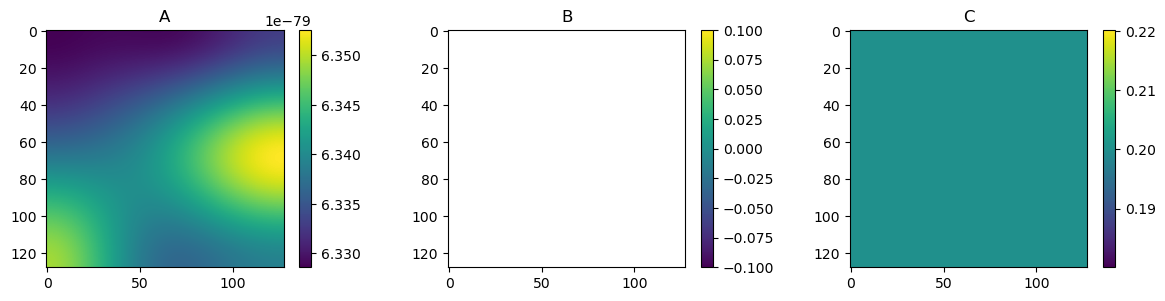

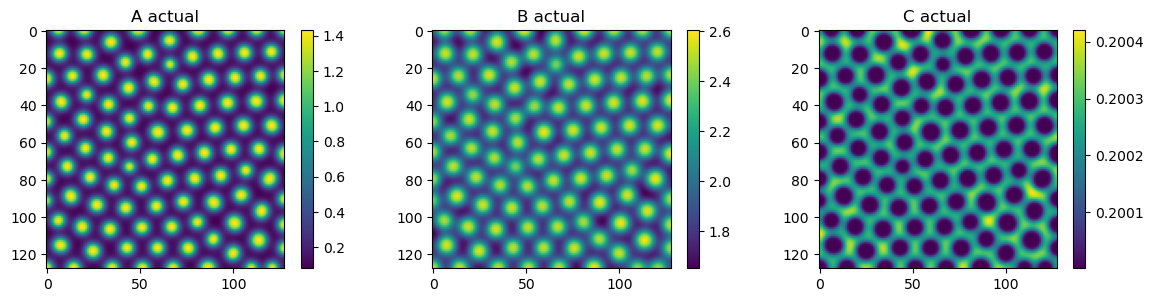

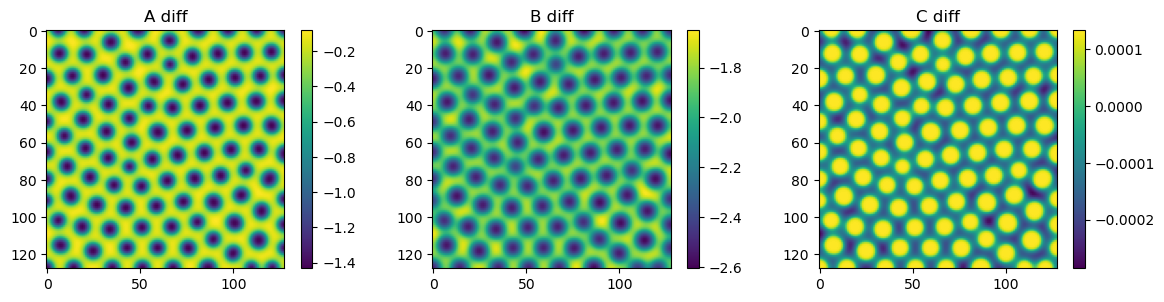

In [25]:

params2 = {}
for k,v in estimated_params.items():
    if not k.startswith("K"):
        params2[k] = v
    else:
        lower, upper = Ks_bounds[k]
        if v < lower:
            params2[k] = lower
        elif v > upper:
            params2[k] = upper
        else:
            params2[k] = v

kinetics = create_circuit_3954(n,params2["b_A"], params2["mu_A"], params2["V_A"], 
                                       params2["K_AA"], params2["K_AB"], params2["K_AC"],
                                       params2["b_B"], params2["mu_B"], params2["V_B"], 
                                       params2["K_BA"], params2["K_BC"],
                                       params2["b_C"], mu_C, params2["V_C"], 
                                       params2["K_CB"], params2["K_CC"])

(A_init, B_init, C_init) = (solution[0, 0, :, :].flatten(),
                            solution[0, 1, :, :].flatten(),
                            solution[0, 2, :, :].flatten())
solution_test = model_integrator.integrate([A_init, B_init, C_init],kinetics, 4*5000, record_steps=5000)

A_test = solution_test[-1,0, :].reshape((128,128))
B_test = solution_test[-1,1, :].reshape((128,128))
C_test = solution_test[-1,2, :].reshape((128,128))
plot_n_im([A_test,B_test,C_test], 
           ["A","B","C"],          
        figsize=(12, 3)); plt.tight_layout();plt.show() 

plot_n_im([solution[105, 0, :, :],solution[105, 1, :, :],solution[105, 2, :, :]], 
           ["A actual","B actual","C actual"],          
        figsize=(12, 3)); plt.tight_layout();plt.show() 

plot_n_im([A_test-solution[105, 0, :, :],
           B_test-solution[105, 1, :, :],
           C_test-solution[105, 2, :, :]], 
           ["A diff","B diff","C diff"],          
        figsize=(12, 3)); plt.tight_layout();plt.show() 

In [16]:
{1:31,
2:3,
3:9, 
4:25,
5:14,
6:60,
7:24,
8:26,
9:65}

{1: 31, 2: 3, 3: 9, 4: 25, 5: 14, 6: 60, 7: 24, 8: 26, 9: 65}

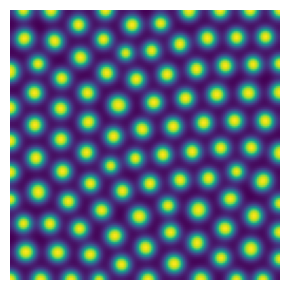

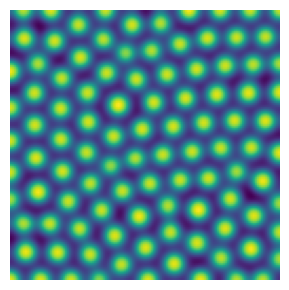

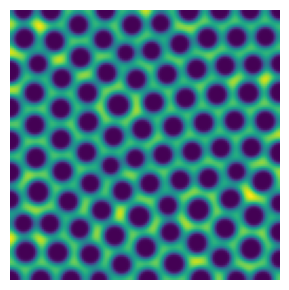

In [17]:
plot_n_im([solution[-1, 0, :, :]], 
           [""],          
        figsize=(12, 3),add_colorbar=False);
ax = plt.gca()
ax.set_axis_off()
plt.tight_layout();plt.show() 
plot_n_im([solution[-1, 1, :, :]], 
           [""],          
        figsize=(12, 3),add_colorbar=False);
ax = plt.gca()
ax.set_axis_off()
plt.tight_layout();plt.show() 
plot_n_im([solution[-1, 2, :, :]], 
           [""],          
        figsize=(12, 3),add_colorbar=False);
ax = plt.gca()
ax.set_axis_off()
plt.tight_layout();plt.show() 